# Analyse de données de films

Nous proposons de travailler sur des données décrivant des films. Les possibilités sont larges et vous êtes évalués sur vos propositions et votre méthodologie plus que sur vos résultats.

Les données de départ sont disponibles sur:
https://grouplens.org/datasets/movielens/
au format CSV. 

Nous nous intéresserons en particulier au jeu de données: **MovieLens 20M Dataset**. Dans ce jeu de données, vous disposez entre autre de:
* Idendifiant du film dans IMdb et TMdb (ça sera important ensuite)
* Catégorie(s) du film
* Titre du film
* Notes données par les internautes aux films

Afin de rendre le projet plus intéressant, nous ajoutons des données sur les acteurs et producteurs associés aux films (récupéré sur TMdb). Ces données sont disponibles sur les liens suivants:

http://webia.lip6.fr/~guigue/film_v2.pkl <br>
http://webia.lip6.fr/~guigue/act_v2.pkl <br>
http://webia.lip6.fr/~guigue/crew_v2.pkl

Ces fichiers contiennent respectivement : une nouvelle description des films (dont l'identifiant TMdb et la note moyenne donnée par les internautes, la date de sortie,...), une description des acteurs de chaque film et une description des équipes (scénariste, producteur, metteur en scène) pour chaque film.

Ces données sont des listes de taille 26908, chaque élément de la liste correspondant à un dictionnaire dont vous étudierez les clés pour récupérer les informations utiles.

**ATTENTION** Les contraintes de récupération d'informations en ligne font que la base MovieLens compte 27278 films mais les fichiers ci-dessus n'en comptent que 26908. Le plus simple est probablement d'éliminer les films de MovieLens qui ne sont pas dans cette seconde base.

## Consignes générales pour l'analyse des données

Vous devez proposer plusieurs analyses des données, qui devront à minima utiliser les
 techniques suivantes:
 
1. Mettre en forme les données pour identifier les acteurs et les catégories, les indexer
1. Traiter au moins un problème de régression supervisé (par exemple la prédiction de la note moyenne donnée à un film par les internautes).
1. Traiter au moins un problème de classification supervisé (par exemple la prédiction de la catégorie d'un film)
1. Utiliser les données catégorielles (catégories, acteurs,...) de manière discrète ET de manière coninue (*dummy coding*) dans des approches différentes
1. Proposer au moins une approche de catégorisation non supervisée (pour regrouper les acteurs par exemple)
1. Mener une campagne d'expérience permettant de comparer les performances sur un problème en fonction des valeurs d'un paramètre (et donc, in fine, trouver la meilleure valeur du paramètre)
1. Proposer quelques illustrations

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl
import graphviz as gv
import random
import scipy.cluster.hierarchy
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils

# importation de arbre
from iads import Arbre as ar

# importation de Clusters
from iads import Classifiers as clu



## Chargement des données (base MovieLens + enrichissements)

In [15]:
# Chargement des données MovieLens
fname_links ="/Users/Nathanbrami/Desktop/3I026/projet/ml-20m"
links = pd.read_csv(fname_links, encoding='utf8')
links.head()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
print("Il y a", len(links), "exemples dans la base links.")

In [ ]:
# Chargement des données MovieLens
fname_movies ="C:/Users/oussamasahli/3i026/projet/ml-20m/movies.csv"
movies = pd.read_csv(fname_movies, encoding='utf8')
movies.head()

In [ ]:
print("Il y a", len(movies), "exemples dans la base movies.")

In [6]:
# Chargement des données MovieLens  , rating -> score 
#la note attribué par chacun des internautes aux différents films
fname_ratings ="C:/Users/oussamasahli/3i026/projet/ml-20m/ratings.csv"
ratings = pd.read_csv(fname_ratings, encoding='utf8')
ratings.head()

FileNotFoundError: [Errno 2] File b'C:/Users/oussamasahli/3i026/projet/ml-20m/ratings.csv' does not exist: b'C:/Users/oussamasahli/3i026/projet/ml-20m/ratings.csv'

In [ ]:
print("Il y a", len(ratings), "exemples dans la base ratings.")

In [ ]:
# Chargement des données MovieLens
#les internautes attributs un tag à chacun ds films qu'ils ont vues
fname_tags ="C:/Users/oussamasahli/3i026/projet/ml-20m/tags.csv"
tags = pd.read_csv(fname_tags, encoding='utf8')
tags.head()

In [ ]:
print("Il y a", len(tags), "exemples dans la base tags.")

In [ ]:
# Chargement des données MovieLens
fname_genome_tags ="C:/Users/oussamasahli/3i026/projet/ml-20m/genome-tags.csv"
genome_tags = pd.read_csv(fname_genome_tags, encoding='utf8')
genome_tags.head()


In [ ]:
print("Il y a", len(genome_tags), "exemples dans la base genome_tags.")

In [ ]:
# Chargement des données MovieLens , relevance =pertinance 
fname_genome_scores ="C:/Users/oussamasahli/3i026/projet/ml-20m/genome-scores.csv"
genome_scores = pd.read_csv(fname_genome_scores, encoding='utf8')
print("Il y a", len(genome_scores), "exemples dans la base genome_scores.")
genome_scores.head()

In [ ]:
print("Il y a", len(genome_scores), "exemples dans la base genome_scores.")


In [ ]:
# Chargement des données complémentaires , liste de liste de dictionnaire donnant des infos sur les acteur de chaque films
fname_acteurs ="C:/Users/oussamasahli/3i026/projet/ml-20m/act_v2.pkl"
acteurs = pkl.load(open(fname_acteurs, "rb"))
acteurs[0][0]

In [ ]:
#attention dans chacunes de ces 26908 listes il y a plusieurs dico , dont chaque dico correspond à un acteurs
print("Il y a", len(acteurs), "exemples dans la base acteurs.")

In [ ]:
# Chargement des données complémentaires  , liste de liste de dictionnaire donnant des infos sur description des equipes
fname_crews ="C:/Users/oussamasahli/3i026/projet/ml-20m/crew_v2.pkl"
crews = pkl.load(open(fname_crews, "rb"))
crews[0][0]
#chaque liste de cette base contient une liste de dico , où chaque dico est asscocié à un membre de l'équipe
#il y a autant de liste que de films
#pour chaque films on decrit la liste de lequipe qui l'a réalisé

In [ ]:
print("Il y a", len(crews), "exemples dans la base crews.")

In [ ]:
# Chargement des données complémentaires  , liste de dictionnaires donnant des infos sur nouvelles descriptions des films
fname_movies2 ="C:/Users/oussamasahli/3i026/projet/ml-20m/film_v2.pkl"
movies2 = pkl.load(open(fname_movies2, "rb"))
movies2[0]


In [ ]:
print("Il y a", len(movies2), "exemples dans la base movies2.")

In [ ]:
m=movies['movieId']==862
movies[m]

In [ ]:
#on va construire un liste contenant les id des  films de la base 2 , afin denlever les id des films de la base1 (movies)
#qui ne sont pas dans la base 2
listes_id_base2=[]

for i in range(0,len(movies2)):
    dico=movies2[i]
    listes_id_base2.append(dico['id'])

ids_base2=np.unique(listes_id_base2)
ids_base2.sort()
ids_base1=np.unique(movies["movieId"].values)

#ids_diffs=np.setdiff1d(ids_base1, ids_base2)
#print(len(ids_diffs))


dans la base moviLens original on a 27278 exemple
dans la base 2 (celle où il y a plus de description sur le film)  il y a 26908 exemple
quand je fais la difference entre ces deux ensembles , jen obtient 22435 exemples de la base original quine sont pas dans la base2
ce resultat est faux parceque en fait les id ds films de la base original et ceux de la base 2 ne sont pas identique pour 
le meme film

Cest parceque en fait les ids de la base2 sont décrit par la colonne tmdbId dans la base links (où chaque liens est associé 
à un fillm ).

In [ ]:
tmdbids_base1=np.unique(links["tmdbId"].values)
#jenleve les valeurs nan
tmdbids_base1= tmdbids_base1[np.logical_not(np.isnan(tmdbids_base1))] 
print(len(tmdbids_base1))
#Certain films nont pas de tmdbid ->valeur nan

In [7]:
tmdbids_base1.sort()
#ids_base2=ids_base2.astype(float)
ids_diffs=np.setdiff1d(tmdbids_base1, ids_base2)
print("il y a ",len(ids_diffs)," films de la base originale Movielens(movies) qui ne sont pas dans la base movies2")

NameError: name 'tmdbids_base1' is not defined

je retire tous les tmdbids de links qui sont dans ids_diffs

In [ ]:
tmdbids_garder=np.setdiff1d(tmdbids_base1, ids_diffs)
print("on ne garde que ",len(tmdbids_garder)," films de la base movilens originale")
#cest normal quon n'en pas 26908 car certains tmbdid sont nuls dans la base links

In [ ]:
tmdbids_garder

In [ ]:
#nouvelle base links avec que les ids de films quon garde
frame=[]

for x in tmdbids_garder:
    m=(links['tmdbId'] ==x)
    frame.append(links[m])

res=pd.concat(frame)
res=res.sort_index(axis = 0)
res.head()


In [ ]:
#ca va me permettre de garder que les titre des film sans les annnées en paranthèses
r=movies[movies["movieId"]==5]["title"].values[0]
tab=r.split('(')
tab[0]

In [ ]:
r=movies[movies["movieId"]==5]["movieId"].values[0]
r


In [ ]:

my_ids=np.unique(res["movieId"])
tab_movie_ids=[]
tab_title=[]
tab_genre=[]

for x in my_ids:
    m=(movies['movieId'] ==x)
    ligne=movies[m]
    tab_movie_ids.append(ligne["movieId"].values[0])
    tab_title.append(ligne["title"].values[0].split('(')[0].strip())  #strip permet denlever les espaces à la fin et au debut de la chaine
    tab_genre.append(ligne["genres"].values[0])




In [ ]:
MoviesSansParenthese= pd.DataFrame({'movieId': tab_movie_ids, 'title':tab_title, 'genres':tab_genre})

La base MoviesSansParenthese va nous permettre plus loin , de pouvoir associé les ids_genres aux genres à qui 
ils font références

In [ ]:
MoviesSansParenthese.head()

In [ ]:
print('Il y a ',len(MoviesSansParenthese),'exemples dans la base MoviesSansParenthese')

In [ ]:
my_ids=np.unique(res["movieId"])
frame=[]

for x in my_ids:
    m=(movies['movieId'] ==x)
    frame.append(movies[m])

New_movieLens=pd.concat(frame)
New_movieLens=New_movieLens.sort_index(axis = 0)



In [ ]:
New_movieLens.head()

In [ ]:
print("Il y a ",len(New_movieLens)," exemples dans ma nouvelle base New_movieLens")

## Feature engineering
A vous de créer les caractéristiques de description des données qui permettront d'améliorer les performances dans les tâches que vous aurez choisi d'aborder dans le projet.

In [ ]:
# Faire un dictionnaire avec tous les acteurs (acteur => indice)
# + un dictionnaire inversé (indice => acteur)
actors = dict()
actors_inv = dict()
for lista in acteurs:
    for a in lista:
        # affecte une valeur à une clé si la clé n'est pas utilisée
        res = actors.setdefault(a['name'], len(actors))
        if res == len(actors)-1:
            actors_inv[len(actors)-1] = a['name']

# Exemple de transformation supplémentaire
# Dans combien de films de base joue Tom Hanks? (Réponse 57)
# Dans combien de comédies...

# => On voit qu'il est possible de créer facilement des nouvelles caractéristiques qui
# apporteront des informations utiles pour certaines tâches

In [ ]:
#cest un dictionnaire contenant le noms des acteurs
print("Il y a", len(actors_inv), "exemples dans la base actors_inv.")
print(actors_inv[0])

In [ ]:
# Dans combien de films de base joue Tom Hanks? (Réponse 57)
cpt=0
for lista in acteurs:
    for a in lista:
        if(a['name']=='Tom Hanks'):
            cpt=cpt+1
print("Tom Hanks a joué dans ",cpt," films")

In [ ]:
categories=np.unique(New_movieLens['genres'])
print("il y a ",len(categories),"catégories différentes de films")

En fait il y en a 19 mais certaines sont rassemblé avec des |

Regression Linéaire
etape1:
on cherche à prédire la note moyenne donné à un film par les internautes


In [ ]:
movies2[0]


In [ ]:
notes_moyennes=dict()
for film in movies2:
    notes_moyennes[film['title']]=film['vote_average']

#affichage du debut du dico
i=0
n=5
for cle in notes_moyennes:
    print('le film  ',cle,' a obtenue une note de ',notes_moyennes[cle])
    if(i==n):
        break
    i=i+1

On constate que les notes sont comprisent entre 0 et 10 ,alors que les notes attribuées par le public sont comprises
entre 0 et 5 dans la base ratings

In [ ]:
#je vais reconstituer la note du film toy storie dont le movieId=1
m=ratings["movieId"]==1
notes=np.array(ratings[m]["rating"])
notes
s=0
for note in notes:
    s=s+note
    
print('le film Toy Storie a obtenue un note moyenne de ',s/len(notes),'/5 ')
print('le film Toy Storie a obtenue un note moyenne de ',s/len(notes)*2,'/10 ')

on va visualiser la note moyenne attribuée à un film en fonction de sa popularitée

In [ ]:
notes_moyennes= []
popularites=[]
cle='popularity' # certain film nont pas dattribut popularity (2 seulement)

for film in movies2:
    if cle in film:
        popularites.append(film['popularity'])
        notes_moyennes.append(film['vote_average'])

notes_moyennes=np.array(notes_moyennes)
popularites=np.array(popularites)


In [ ]:
""" ici je visualise la note moyenne des films en fonction de leus popularitées
"""

colors=np.random.rand(len(popularites))
area= np.pi * (15 * np.random.rand(len(popularites)))**2
#En abcisse on veut les popularites , et en ordonnée les notes
plt.scatter(popularites,notes_moyennes,s=area, c=colors, alpha=0.5)

plt.title('Note en fonction de la popularité')
plt.xlabel('popularity')
plt.ylabel('note_moyenne')
plt.show()

on observe une linéarité des points -- > on peut dire que plus la popularité est élevée et meilleur
sera la note_moyenne

In [4]:
notes_moyennes= []
votans=[]
cle='popularity' # certain film nont pas dattribut popularity (2 seulement)

for film in movies2:
    if cle in film:
        votans.append(film['vote_count'])
        notes_moyennes.append(film['vote_average'])

notes_moyennes=np.array(notes_moyennes)
votans=np.array(votans)



""" ici je visualise la note moyenne des films en fonction du nombres de votants
"""

colors=np.random.rand(len(votans))
area= np.pi * (15 * np.random.rand(len(votans)))**2
#En abcisse on veut les votans , et en ordonnée les notes
plt.scatter(votans,notes_moyennes,s=area, c=colors, alpha=0.5)

plt.title('Note en fonction du nombre de votant')
plt.xlabel('nombre_de_votans')
plt.ylabel('note_moyenne')
plt.show()

NameError: name 'movies2' is not defined

On observe que plus les gens aiment un film et + ils seront nombreux à voter

Text(0.5, 1.0, 'nombres de personnes par notes')

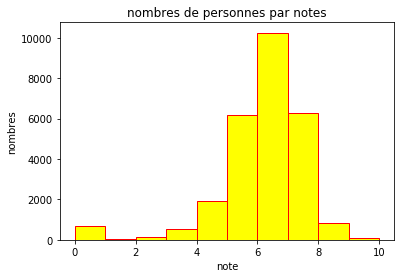

In [46]:
"""Ici on visualise le nombre de fois où une note a été donné"""

plt.hist(notes_moyennes,color = 'yellow',edgecolor = 'red')
plt.xlabel('note')
plt.ylabel('nombres')
plt.title('nombres de personnes par notes') 

On remarque que la plupart des gens mettent une note entre 6 et 8.

''

Etape 2:
On va essayer de faire de la classification avec des classifieurs

je vais prédire la catégorie dun film à partir des acteurs qui jouent dans ce film .
Pour cela il faut regarder pour quel genre de film chaque acteurs est le + succeptible de jouer

In [47]:
New_movieLens.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


on observe qu'un film peut être associé à plusieurs catégories

In [48]:
genres=New_movieLens["genres"].values
genres

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ..., 'Adventure',
       '(no genres listed)', 'Adventure|Fantasy|Horror'], dtype=object)

In [49]:
liste_genres=[]

for genre in genres:
    if(genre!='(no genres listed)'):
        tab=genre.split('|')
        for elem in tab:
            liste_genres.append(elem)

liste_genres=np.unique(liste_genres)

In [50]:
liste_genres

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype='<U11')

In [51]:
print('il y a ',len(liste_genres),' genres différents de films')

il y a  19  genres différents de films


L'objectif de la classification supervisée est principalement de définir des règles permettant de classer des objets dans des classes à partir de variables qualitatives ou quantitatives caractérisant ces objets.
Ici les objets qu'on cherche à classer sont titres de films, et les classes qui leur sont associées sont les genres de films.
Et ce qui va caractériser un film , ce sont les acteurs qui y jouent.
Pour chaque acteur on déterminera la catégorie de film où il a le plus joué.l'acteur sera associé à cette catégorie.
Pour chaque film , on liste les catégorie associée à chaque acteurs de ce film , et on récup la catégorie qui apprait le +
de fois, et on l'associe au film.
On a vue qu'un film peut être associé à plusieurs catégories , il faudra faire en sorte de ne l'associer qu'à une seule 
catégorie.



In [52]:

genre_ids=dict()
for movie in movies2:
       genre_ids[movie['title']]=movie['genre_ids']
        


Par  exemple on cherche à retrouver la categorie du film :Father of the Bride Part II (1995)  (Comedy)


In [53]:
New_movieLens.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [54]:
print('il y a ',len(acteurs[4]),' acteurs qui ont joué dans le film Father of the Bride Part II (1995)') # on sait que ce film est à la 4 eme position dans cette liste de liste de dico , dapres sa position dans la base movies2 

il y a  12  acteurs qui ont joué dans le film Father of the Bride Part II (1995)


In [55]:
id_acteurs=[]
name_acteurs=[]
for acteur in acteurs[4]:
    id_acteurs.append(acteur['id'])
    name_acteurs.append(acteur['name'])

In [56]:
print(id_acteurs)
print(name_acteurs)

[67773, 3092, 519, 70696, 59222, 18793, 14592, 20906, 54348, 209, 26510, 24358]
['Steve Martin', 'Diane Keaton', 'Martin Short', 'Kimberly Williams-Paisley', 'George Newbern', 'Kieran Culkin', 'BD Wong', 'Peter Michael Goetz', 'Kate McGregor-Stewart', 'Jane Adams', 'Eugene Levy', 'Lori Alan']


Pour chacun de ces acteurs je regardes dans quelles genre de film il a joué.
Je sais que chaque ligne dans la base acteurs correspond à un film dans la base movies2.
Le but cest de regarder dans quel genre de film joue lacteur

On va essayer de construire un dictionnaire dont les clés sont les ids_genres de chaque genre , et la valeur associé sera le genre

In [57]:
#je pars à la recherche des films dans lesquels Steve Martin a joué , pour en récup les genres

Liste_film_genre_Steve_Martin=[]
i=0

for lista in acteurs:
    for dico_acteur in lista:
        if (dico_acteur['name']=='Steve Martin'):
            Liste_film_genre_Steve_Martin.append(movies2[i]['genre_ids'])
    i=i+1       
        


Ici j'ai récuperer les id des genres associé aux films dans lesquels steve Martin a joué

In [58]:
Liste_film_genre_Steve_Martin[1]

[35, 18, 10749]

Il nous reste à determiner le genre dun film à partir de son id_genre 

In [59]:
Liste_ids_genre=[]
Liste_name_movie=[]

for movie in movies2:
    Liste_ids_genre.append(movie['genre_ids'])
    Liste_name_movie.append(movie['title'])



In [60]:
Liste_name_movie[0:5]

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II']

In [61]:
Liste_ids_genre[0:5]

[[16, 35, 10751], [12, 14, 10751], [35, 10749], [35, 18, 10749], [35]]

In [62]:
for i in range (0,len(Liste_ids_genre[0])):
    Liste_ids_genre[0][i]=str(Liste_ids_genre[0][i])
ch="|".join(Liste_ids_genre[0])
ch

'16|35|10751'

In [63]:
Liste_ids_genre[0:5]

[['16', '35', '10751'], [12, 14, 10751], [35, 10749], [35, 18, 10749], [35]]

In [64]:
Liste_ids_genres_chaine=[]

for i in range (0,len(Liste_ids_genre)):
    for j in range (0,len(Liste_ids_genre[i])):
        Liste_ids_genre[i][j]=str(Liste_ids_genre[i][j])
    ch="|".join(Liste_ids_genre[i])
    Liste_ids_genres_chaine.append(ch)
    

In [65]:
Liste_ids_genres_chaine[0:5]

['16|35|10751', '12|14|10751', '35|10749', '35|18|10749', '35']

In [66]:
movies2[0]

{'adult': False,
 'backdrop_path': '/dji4Fm0gCDVb9DQQMRvAI8YNnTz.jpg',
 'genre_ids': ['16', '35', '10751'],
 'id': 862,
 'original_language': 'en',
 'original_title': 'Toy Story',
 'overview': "Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",
 'poster_path': '/rhIRbceoE9lR4veEXuwCC2wARtG.jpg',
 'release_date': '1995-10-30',
 'title': 'Toy Story',
 'video': False,
 'vote_average': 7.9,
 'vote_count': 9550,
 'popularity': 22.773}

In [67]:
MoviesSansParenthese.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [68]:
#prend un peu de temps

i=0
Liste_names_genre=[]
for name in Liste_name_movie:
    tab=MoviesSansParenthese[MoviesSansParenthese['title']==name]["genres"].values
    if(len(tab)!=0):
        Liste_names_genre.append(tab[0])
    else:
        Liste_names_genre.append('') #pour certaines lignes le genre est vide dans le dataframe
    
    
    
    

In [69]:
Liste_names_genre[0:5]

['Adventure|Animation|Children|Comedy|Fantasy',
 'Adventure|Children|Fantasy',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Comedy']

In [70]:
Data_genre=pd.DataFrame({'genres': Liste_names_genre,  'genre_ids':Liste_ids_genres_chaine})

In [71]:
print('film: ',movies2[0]["title"])
print('id_genres associé :', movies2[0]["genre_ids"])
print('genre associé dans la base movie :',MoviesSansParenthese[MoviesSansParenthese["title"]=="Toy Story"]["genres"].values)

film:  Toy Story
id_genres associé : ['16', '35', '10751']
genre associé dans la base movie : ['Adventure|Animation|Children|Comedy|Fantasy']


 Si on part du principe que les genres_ids de la base movies2 (descriptif plus approfondit du film) font reférences aux genres du film , on voit bien que dans ce cas 3!=5.
 
 on va donc  partir à la recherche de l'id  majoritaire dun genre pour faire lassociation entre les deux et réduire l'erreur

In [72]:
Data_genre.head()

,genres,genre_ids
0,Adventure|Animation|Children|Comedy|Fantasy,16|35|10751
1,Adventure|Children|Fantasy,12|14|10751
2,Comedy|Romance,35|10749
3,Comedy|Drama|Romance,35|18|10749
4,Comedy,35


on voit bien qu'il y a un probleme sur le dataFrame , si on prend la premiere ligne , on voit que dun coté
on a 5 genres et de lautre côté on a 3 genre_id qui ont eté récupéré dan sla base movies2.
Pour arranger ça on va essayer de faire en sorte de récup l'id majoritaire pour chaque genre(de cette manière on réduira lerreur quand on associera un id  à une catégorie de film(genre)).

Par exemple pour le film Toy Story ; dans la Base movie il y a 5 genres qui lui sont associé (Adventure|Animation|Children|Comedy|Fantasy)  , alors que quand on regarde la desccription du film dans la base movies2
il n'y a que que 3 genres qui lui sont associé 

je vais faire en sorte que pour chaque catégorie il y ait un seul id


In [73]:
liste_genres=liste_genres
my_liste_genre=liste_genres.tolist()
my_liste_genre

['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [74]:
Data_genre[Data_genre["genre_ids"]=="16"].tail()
#on verra par la suite que le genre Animation apparait le + de fois pour lid 16 , donc id_genre_Animation=16

,genres,genre_ids
25883,Comedy,16
25886,,16
25892,Animation,16
25893,Animation,16
26860,(no genres listed),16


Le Dataframe obtenue n'est pas tous a fait correct , du coup pour chaque id on récupère le genre majoritaire qui lui correspond.
A la fin le but cest de construire un Dataframe où chaque genre est associé à un id

In [75]:
mes_genres_ids=Data_genre["genre_ids"].values
mes_genres_ids[0:5]

array(['16|35|10751', '12|14|10751', '35|10749', '35|18|10749', '35'],
      dtype=object)

In [76]:
Liste_ids_genre_unique=[]

for x in mes_genres_ids:
    tab=x.split('|')
    for elem in tab:
        if(elem not in Liste_ids_genre_unique and elem!=''):
            Liste_ids_genre_unique.append(elem)

In [77]:
 print('je retrouve bien  mes',len(Liste_ids_genre_unique),'genres')

je retrouve bien  mes 19 genres


In [78]:
len(Liste_ids_genre_unique)

19

In [79]:
def genreMajoritaire(Liste):  #on a vue que dans le datframe un id se retrouve parfois associé à plusieur genres , ce phénomène a du se passer lors du tri, on va dnc faire que chaque id correspond bien à un seul genre
    dico=dict()
    for i in range(0,len(Liste)):
        if(Liste[i]!='' and ('|' not in Liste[i])):   #plusieurs on retrouve '' qui est associé à un id genre , or c'est faux. et Egalement il se peut que le genre qui appparait le plus ne soit pas unique , du coup il faut eliminer ces possibiilités
            dico[Liste[i]]=0
        
    for x  in Liste:
        if(x!='' and ('|' not in x)):
            dico[x]=dico[x]+1
    
    maxx=-10000
    majo=''
    for x in Liste:
        
        if(x!='' and ('|' not in x)):
            if(dico[x]>maxx):
                maxx=dico[x]
                majo=x
    
    return majo  
        
        
        

In [80]:
liste_valeurs=Data_genre[Data_genre["genre_ids"]=="35"]["genres"].values
liste_valeurs=liste_valeurs.tolist()
liste_valeurs[0:5]

['Comedy', 'Comedy|Crime', 'Comedy', 'Comedy', 'Comedy']

In [81]:
dictionaire_genre_idgenre=dict()

for x in Liste_ids_genre_unique: 
    liste_valeurs=Data_genre[Data_genre["genre_ids"]==x]["genres"].values
    liste_valeurs=liste_valeurs.tolist()
    genre_majoritaire=genreMajoritaire(liste_valeurs)
    dictionaire_genre_idgenre[x]=genre_majoritaire

In [82]:
dictionaire_genre_idgenre

{'16': 'Animation',
 '35': 'Comedy',
 '10751': 'Children',
 '12': 'Adventure',
 '14': 'Fantasy',
 '10749': 'Romance',
 '18': 'Drama',
 '28': 'Action',
 '80': 'Crime',
 '53': 'Thriller',
 '27': 'Horror',
 '36': '',
 '878': 'Sci-Fi',
 '9648': 'Mystery',
 '10752': 'War',
 '10402': 'Musical',
 '99': 'Documentary',
 '37': 'Western',
 '10770': 'Drama'}

In [83]:
l=[]
for key in dictionaire_genre_idgenre.keys():
    l.append(key)
tab=np.array(l)
tab=np.unique(tab)
len(tab)

19

On a reussit à associé à chacun des genre l'id qui lui correspond , ça facilitera des traitements futur sur les données
On a presque finit le tri , on voit que pour lid 36 il y a une erreur , du coup on va lui asscoié le dernier genre qui n'a pas été choisit parmis les 19 possibles.
On s'apercoit aussi que Dram est associé à 18 et 10770

In [84]:
Data_genre[Data_genre["genre_ids"]=="36"]["genres"]

16785                 
19418                 
22837    Drama|Fantasy
Name: genres, dtype: object

In [85]:
Liste_genre_non_selectionne=[]

Liste_key=[ dictionaire_genre_idgenre[key] for key in dictionaire_genre_idgenre.keys()]

for elem in my_liste_genre:
    if(elem not in Liste_key):
        Liste_genre_non_selectionne.append(elem)
        

In [86]:
Liste_genre_non_selectionne

['Film-Noir', 'IMAX']

Tous ls ids ont été attribué sauf que 36-->'' , 18 et 10770-->'Drama' , donc on se retrouve avec deux genres sans id (['Film-Noir', 'IMAX']) et un id qui pointe vers aucun genre et un deux id qui pointe vers le meme genre

In [87]:
Data_genre[Data_genre["genres"]=="IMAX"]

,genres,genre_ids
4342,IMAX,99


In [88]:
Data_genre[Data_genre["genres"]=="Film-Noir"]

,genres,genre_ids
730,Film-Noir,28|80|18
1123,Film-Noir,80|53
1124,Film-Noir,80|53
1968,Film-Noir,18|9648|53
3271,Film-Noir,18|53
4308,Film-Noir,18|9648|53
5050,Film-Noir,18
7167,Film-Noir,28|80|53
7192,Film-Noir,80|18|53
18206,Film-Noir,53|80|18


In [89]:
movies[movies["genres"]=="IMAX"]

,movieId,title,genres
4365,4460,Encounter in the Third Dimension (1999),IMAX


In [90]:
for dico in movies2:
    if dico['title']=="Encounter in the Third Dimension":
        print('gennres-ids :',dico['genre_ids'],' | title:',dico["title"])

gennres-ids : ['99']  | title: Encounter in the Third Dimension


On voit bien que lagorithme qu'on a mit en place (touvé l'id majoritaire dun genre) laisse apparaitre encore quelques petites erreurs.
Mais on va garder notre 'dictionaire_genre_idgenre' en souligant que les film de genre IMAX et Film-Noir ne feront pas parties  de nos exemples futur car notre algorithme n'a pas pu retrouvé lid qui leur correspondait le mieux. Et de même pour un film dont le genre_id majoritaire est 36  , on prendra la valeur du genre-id pour lequel il y a un genre qui lui est associé.

PREMIERE CLASSIFICATION SUPERVISEE: ARBRE DE DECISIONS
    
Protocole:
        
        question : Est-ce que cet acteur est succeptible de jouer dans ce film ?
        attribues : catégorie (genre de film) spécifique à l'acteur (celle dans laquelle il a le plus l'habitude de jouer),
                    genre(Homme,Femme,?) -> 2,1,0
        Décision: peut jouer dans ce film.
        
        Préparation des données: chaque acteur est composé d'un vecteur en deux dimension (catégorie spécifique,sexe).
                                 le label associé à l'acteur sera 1 si l'acteur est présent dans le film, sinon -1.
                             
        Objectif: Arriver à savoir si un acteur peut jouer un film en particulier , à partir des données relatés sur lui
                  (catégorie spécifique, sexe).
               
        Les questions qui seront amenées à être posées seront : quel est le sexe de l'acteur , quel est la catégorie spécifique de l'acteur.
        
        Le but étant de construire notre arbre en lui faisant poser les bonnes questions afin de savoir si l'acteur peut jouer dans le film.
    (En quelques sorte on cherche à determiner quel seront les meilleur questions à poser )

Pour illustrer notre Démarche , on va prendre le film : Toy Story

Etape1 :
    Commençons par définir la catégorie scpéfique à chaque acteur (Tous et pas juste ceux qui sont dans le film).
    puis leur sexe.
    L'objectif est de constuire un Datframe avec comme attribut : idActeur , nomActeur, Categoriespécifique,sexe

In [91]:
#le traitement est long 10 min , jai restreint à 1000 parceque cest trop long si je veux recup tous les acteurs
ListeNameActeur=[]
ListeIdActeur=[]
ListeGenderActeur=[]

for i in range(0,1000):    
    for dicoActeur in acteurs[i]:
        if(dicoActeur["name"] not in ListeNameActeur):
            ListeNameActeur.append(dicoActeur["name"])
            ListeIdActeur.append(dicoActeur["id"])
            ListeGenderActeur.append(dicoActeur['gender'])
        

In [92]:
print(len(ListeNameActeur))

13672


Pour chaque acteur récuperer les films dans lequel il a joué(et leur genre)

Ecrire une fonction qui prend en argument un nom dacteur  et retourne la liste des id-genres de films dans lequel il a joué 

In [93]:
def IdActeur(name):
    ListeId=[]
    ListeFilms=[]
    
    for i in range(0,len(acteurs)):
        for dicoActeur in acteurs[i]:
            if(dicoActeur["name"]==name):
                tab=movies2[i]["genre_ids"]
                ListeFilms.append(movies2[i]["title"])
                for k in range(0,len(tab)):
                    if(tab[k]!=''):
                        ListeId.append(int(tab[k]))
                        
        
    return (ListeId,ListeFilms)

In [94]:
l1, l2 =IdActeur("Tom Hanks")
print("Tom hanks a joué dans ",len(l2)," films")

Tom hanks a joué dans  57  films


Ecrire une fonction indMajoritaire qui prend en argument une liste d'id et retourne l'id qui apprait le plus dans la liste

In [95]:
def indMajoritaire(Liste):
    dico=dict()
    #initialisation
    for i in range(0,len(Liste)):
        dico[Liste[i]]=0
    
    for i in range(0,len(Liste)):
        dico[Liste[i]]=dico[Liste[i]]+1
        
    #recherche de lelement qui apparait le + de fois
    maxx=-10000
    for key in dico.keys():
        if(dico[key]>maxx):
            maxx=key
    return maxx

In [96]:
indMajoritaire([1,5,4,8,6,8,4,4,5,4,8,9,4,4])

4

In [97]:
indMajoritaire(l1)

35

In [98]:
print("Tom Hanks a lhabitude de jouer dans des films de genre ",dictionaire_genre_idgenre["35"])

Tom Hanks a lhabitude de jouer dans des films de genre  Comedy


Definir pour chaque nom dacteur lid_genre majoritaire qui lui est associé

In [99]:
def IdGenreMajoritaire(name):
    listeId, listeNameFilm=IdActeur(name)
    return indMajoritaire(listeId)

In [100]:
IdGenreMajoritaire("Tom Hanks")

35

Generer un dataframe avec comme attribut : idActeur , nomActeur, Categoriespécifique,sexe

In [101]:
L=['id' , 'nom', 'id_genre', 'sexe']
Liste=[]
Liste.append(ListeIdActeur[0])
Liste.append(ListeNameActeur[0])
Liste.append(IdGenreMajoritaire(ListeNameActeur[0]))
Liste.append(ListeGenderActeur[0])
print(Liste)
Matrice=np.array([Liste])
ligne=pd.DataFrame(Matrice, columns = L)
ligne

[31, 'Tom Hanks', 35, 2]


,id,nom,id_genre,sexe
0,31,Tom Hanks,35,2


Le temps de Construction du Datframe est beaucoup trop si je garde les 162000 acteurs je vais en garder que quelques pour reduire le temps d'attente (assezpour avoir de bon resultats , voir dans le for)

In [102]:
#temps de traitement long
#ListeNameActeur  --> liste de tous les noms des acteurs
#ListeIdActeur  ---> liste des ids de chaque acteurs
#ListeGenderActeur  --> le sexe de chaque acteurs
#Ces liste ont toutes la meme taille 


#temps attente tres long car 162000 acteur à traiter  # des que jobtient le dataframe je vais le sauvegarder dans un fichier csv comme ca la prochaine fois ca ira vite
frames=[] #on y ajoute les lignes du Datframe au fur et à mesure
       
for i in range(0,1000):  #ici je prend 1000 acteurs mais larbre ne supporte pas un grand nombre de recusrsions , je vais donc devoir selectionner qulques acteurs dont la classe est 1 et quelques acetrrus dont la classe est -1 pour voir apparaitre une frontiere de decision       
    #Construction de la ligne
    Liste=[]
    Liste.append(ListeIdActeur[i])
    Liste.append(ListeNameActeur[i])
    Liste.append(IdGenreMajoritaire(ListeNameActeur[i]))
    Liste.append(ListeGenderActeur[i])
    Matrice=np.array([Liste])
    ligne=pd.DataFrame(Matrice)
    frames.append(ligne)

Data_Acteurs=pd.concat(frames)
    

In [103]:
Data_Acteurs.columns = ['id' , 'name', 'id_genre', 'sexe']

In [104]:
Data_Acteurs.head()

,id,name,id_genre,sexe
0,31,Tom Hanks,35,2
0,12898,Tim Allen,35,2
0,7167,Don Rickles,16,2
0,12899,Jim Varney,35,2
0,12900,Wallace Shawn,35,2


Etape2:
    Une fois l'ensemble de données contenant tous les acteurs de la base généré:
    Le Label associé à l'acteur sera 1 si lacteur est présent dans le film, -1 sinon.
    

Ecrire une fonction prenant en argument un nom d'acteur et un tritre de film .
Cette fonction retourne 1 si l'acteur joue dans le film , -1 sinon.

In [105]:
def ActeurActInFilm(nameA,title):
    l1 , l2=IdActeur(nameA)
    if(title in l2): #l2 = liste des films dans lesquel lacteur a joué
        return 1
    else:
        return -1

In [106]:
ActeurActInFilm("Tom Hanks","Toy Story")

1

Ecrire une fonction GenereDonne prenant en argument un ensemble de données(sous la forme dun dataframe) , et un titre de film.
Elle retourne un ensemble de données sous la forme d'un LabelSet ,  avec comme attribues : catégorie spécifique , sexe

In [107]:
def GenereDonne(DF,title):
    set_exemples = ls.LabeledSet(2)

    for i in range(0,len(DF)):
        id_genre=DF.iloc[i]["id_genre"]
        sexe=DF.iloc[i]["sexe"]
        id_genre=int(id_genre)
        sexe=int(sexe)
        nameA=DF.iloc[i]["name"]
        label=ActeurActInFilm(nameA,title)
        vecteur=[]
        vecteur.append(id_genre)
        vecteur.append(sexe)
        set_exemples.addExample(vecteur,label)
        
    return set_exemples
        

Maintenant on a notre ensemble de données , on peut travailler

Construction de larbre  

    Attention en haut on a généré 1000 acteurs mais l'arbre ne peut supporter qu'un certains nombre de récursions
    .C'est pourquoi on va prélevé un échantillon de 20 exemples (acteurs) dans lensemble de 1000 exemples(acteurs).
    On va en sorte que l'echantillon soit homogène --> c'est à dire qu'il contient assez d'exemple dont la classe est 1 et assez d'exemples dont la classe est -1

In [108]:
def normalisation(Dataf):
    M_Dataf=Dataf.as_matrix()
    L=[]
    for x in Dataf:
        L.append(x) # recup le nom de la colonne
    
    for j in range(0,len(M_Dataf[0])):
        colonne=M_Dataf[0: , j]
        maxx=colonne.max()
        minn=colonne.min()
       
        for i in range(0,len(colonne)):
            
            M_Dataf[i][j]=(M_Dataf[i][j]-minn)/(maxx-minn)
            
    
    df= pd.DataFrame(M_Dataf, columns = L)
    return df

In [109]:
the_set=GenereDonne(Data_Acteurs,"Toy Story")

In [110]:
#ls.affiche_base(the_set)

In [111]:
Data_Acteurs2=Data_Acteurs[["id_genre","sexe"]]

In [112]:
Data_Acteurs2.tail()

,id_genre,sexe
0,18,1
0,18,2
0,18,2
0,18,2
0,18,1


In [113]:
Data_Acteurs2=Data_Acteurs2.astype(float)

In [114]:
Data_Acteurs2.tail()

,id_genre,sexe
0,18.0,1.0
0,18.0,2.0
0,18.0,2.0
0,18.0,2.0
0,18.0,1.0


Affichage des données avant normalisation 

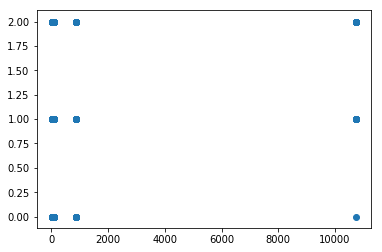

In [115]:
plt.scatter(Data_Acteurs2['id_genre'],Data_Acteurs2['sexe'])

plusieurs points se retrouve avec les mêmes coordonnées , c'est normal 

affichage des données après normalisation
On normalise les données pour les projetés sur la même échelle

In [116]:
DataFnorm=normalisation(Data_Acteurs2)
DataFnorm.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,id_genre,sexe
0,0.002142,1.0
1,0.002142,1.0
2,0.000372,1.0
3,0.002142,1.0
4,0.002142,1.0


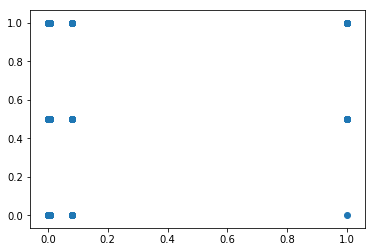

In [117]:
plt.scatter(DataFnorm['id_genre'],DataFnorm['sexe'])

In [118]:
the_set.size()

1000

Cette fonction prend en argument un dataframe et le labelset qui lui est associé , et retourne un nouveau labelSet avec les valeurs normalisés

In [119]:
def NormalisationDonnee(DF,Lset):
    set_Norm = ls.LabeledSet(2)
    DNorm=normalisation(DF)
    
    
    for i in range(0,len(DNorm)):
        id_genre=DNorm.iloc[i]["id_genre"]
        sexe=DNorm.iloc[i]["sexe"]
        id_genre=float(id_genre)
        sexe=float(sexe)
        vecteur=[]
        vecteur.append(id_genre)
        vecteur.append(sexe)
        set_Norm.addExample(vecteur,Lset.getY(i)[0])
    
    return set_Norm

In [120]:
the_set_Norm=NormalisationDonnee(Data_Acteurs2,the_set)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [121]:
#ls.affiche_base(the_set_Norm)

In [122]:
def echantillonLS(X,m):  
       
    S_pos = X.x[np.where(X.y == 1),:][0]      # tous les exemples de label +1
    S_neg = X.x[np.where(X.y == -1),:][0] 
    Lb=ls.LabeledSet(X.input_dimension)  
    
    for j in range(0,m):  
        if(j>=len(S_pos)):
            break
        Lb.addExample(S_pos[j],1)
    
    for j in range(0,m):
        if(j>=len(S_neg)):
            break
        Lb.addExample(S_neg[j],-1)

    return Lb

In [123]:
echl=echantillonLS(the_set_Norm,10) 
#ls.affiche_base(echl)
#type(echl.getX(0)[0])

In [124]:
#echl2=echantillonLS(the_set,10) 
#ls.affiche_base(echl2)

Nos Affichages:  (ca marche pas tout le temps bizarre , et je peux pas le tester sur de grands ensemble)

In [125]:
#test=ar.genereDonne(100,2)   cela ma apermis de voir que l'arbre a du mal à se construire à cause des valeurs des données
#ls.affiche_base(test)

In [126]:
#abin = ar.construit_AD2(echl,0.0)
#gtree = gv.Digraph(format='png')  # je comprend pas pourquoi quand je prend des gros echantillions , ça bug#
#abin.to_graph(gtree)

Affichage frontière de décision de l'arbre   #il y a un probleme au niveau des valeurs des données , car même en les normalisant l'arbre ne veut pas se contruire , jai fais un test avec des valeurs dun dataset du tme6 et j'ai compris que le problème venait des valeurs des exemples de notre dataset

In [127]:
#ad=ar.ArbreDecision(0.0)          
#ad.train(echl)            
#ut.plot_frontiere(echl,ad,20)
#ut.plot2DSet(echl) 

Conclusion:

#On ne pourra conclure que sur de grand ensemble.
IL aurait fallut observer la valeur en ordonné et en abcise des différents attribut pour essayer de déterminer quel sont les
id_genre et le sexe quil faut avoir pour pouvoir jouer dans ce film

CLASSIFICATION NON SUPERVISEE : CLUSTERING HIERARCHIQUE

    Objectif: prédire la catégorie d'un film.
    Protocole: 
           On récupère les acteurs qui sont présent dans ce film.
           on définit un vecteur de coordonnées pour chacun de ces acteurs (catégorie spécifique de l'acteur et son sexe).
           On normailse les données pour les ramener dans l'intervalle [0,1].
           On applique l'algo  du clustering sur ces données.
           

Initialisation : 
    prenons le film Toy story et essayons de prédire la catégorie de ce film (genre).
    Nous on sait d'avance que ce film est catégorié dan sles genres ['16', '35', '10751'] ( Animation,Comedy,Children).
    Le but de notre démarche va être d'observer les distances entre les différentes fusion, Afin de conclure sur quel sera la catégorie qui semble la mieux collé avec le film.
    

Etape 1:
Recuperer les acteurs du films , et construire le Dataframe associé avec l'id_genre majoritaire et le sexe comme attribues

In [128]:
def TrouverPositionFilmDansBaseacteur(title):
    for i in range (0,len(movies2)):
        if(movies2[i]["title"]==title):
            return i
        
    return nan

In [129]:
TrouverPositionFilmDansBaseacteur("Toy Story")

0

In [130]:
def ListActeursbyFilm(title):
    ind=TrouverPositionFilmDansBaseacteur(title)
    ListeNameActeurs=[]
    ListeIdActeurs=[]
    ListeGenderActeurs=[]
    
    
    for acteur in acteurs[ind]:  #rappel --> la bases acteur est une liste de liste de dictionnaire , ou chaque liste représente un un film et les dico qui lui sont associés sont les acteurs qui y jouent
        ListeNameActeurs.append(acteur["name"])
        ListeIdActeurs.append(acteur["id"])
        ListeGenderActeurs.append(acteur["gender"])
        
    return(ListeNameActeurs,ListeIdActeurs,ListeGenderActeurs)
        
        

In [131]:
noms,ids,sexes =ListActeursbyFilm("Toy Story")


In [132]:
print(noms[0:5])
print(ids[0:5])
print(sexes[0:5])  #gender =2  --> cest un homme , gender=1 --cest une femme , gender =0 --> ?

['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']
[31, 12898, 7167, 12899, 12900]
[2, 2, 2, 2, 2]


Maintenant on va générer un Datframe à partir de ces données.


Ecrire une fonction GenereDataFrame qui à partir dune liste de nom d'acteurs , d'une liste d'idacteur et dune liste de genre d'acteurs , retourne le dataframe associé

In [133]:
def GenereDataFrame(l_id,l_name,l_sexe):  # lid -->liste did acteur , lname --> liste nameacteurs , l_sexe--> liste sexes acteurs
    frames=[] #on y ajoute les lignes du Datframe au fur et à mesure

    for i in range(0,len(l_id)):  #ici je prend 1000 acteurs mais larbre ne supporte pas un grand nombre de recusrsions , je vais donc devoir selectionner qulques acteurs dont la classe est 1 et quelques acetrrus dont la classe est -1 pour voir apparaitre une frontiere de decision       
        #Construction de la ligne
        Liste=[]
        Liste.append(l_id[i])
        Liste.append(l_name[i])
        Liste.append(IdGenreMajoritaire(l_name[i])) #retourne l'idgenre majoritaire pour cet acteur (catégorie spécifique --> le genre qui lui correspond le mieux)
        Liste.append(l_sexe[i])
        Matrice=np.array([Liste])
        ligne=pd.DataFrame(Matrice)
        frames.append(ligne)

    res=pd.concat(frames)
    res.columns = ['id' , 'name', 'id_genre', 'sexe']
    return res
    

In [134]:
Data_Acteurs_Cluster=GenereDataFrame(ids,noms,sexes)

In [135]:
Data_Acteurs_Cluster.head()  #déjà quand on voit les id genres qui apparaissent dans ce 
                            #dataFrame on voit bien quon retourve les ids_genre 35,16,10751 associéau film toy story

,id,name,id_genre,sexe
0,31,Tom Hanks,35,2
0,12898,Tim Allen,35,2
0,7167,Don Rickles,16,2
0,12899,Jim Varney,35,2
0,12900,Wallace Shawn,35,2


Maintenant on peut travaillesur ces données

In [136]:
Data_Donnees_Cluster=Data_Acteurs_Cluster[["id_genre","sexe"]]

In [137]:
Data_Donnees_Cluster.head()

,id_genre,sexe
0,35,2
0,35,2
0,16,2
0,35,2
0,35,2


In [138]:
Data_Donnees_Cluster=Data_Donnees_Cluster.astype(float)

Affichage des données avant Normalisation

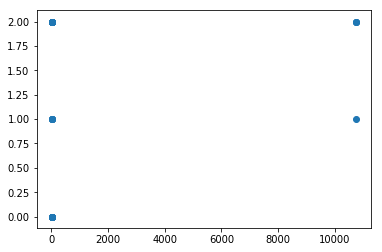

In [139]:
plt.scatter(Data_Donnees_Cluster['id_genre'],Data_Donnees_Cluster['sexe'])

affichage des données après normalisation
On normalise les données pour les projetés sur la même échelle

In [140]:
DataClusternorm=normalisation(Data_Donnees_Cluster)
DataClusternorm.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,id_genre,sexe
0,0.00177,1.0
1,0.00177,1.0
2,0.00000,1.0
3,0.00177,1.0
4,0.00177,1.0


In [141]:
M_data2D= DataClusternorm.as_matrix() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


..\iads\Clusters.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  M_Dataf=Dataf.as_matrix()


Fusion de   0   et   1   pour une distance de 0.0
Fusion de   2   et   7   pour une distance de 0.0
Fusion de   3   et   4   pour une distance de 0.0
Fusion de   5   et   36   pour une distance de 0.0
Fusion de   6   et   9   pour une distance de 0.0
Fusion de   8   et   10   pour une distance de 0.0
Fusion de   11   et   23   pour une distance de 0.0
Fusion de   12   et   16   pour une distance de 0.0
Fusion de   14   et   24   pour une distance de 0.0
Fusion de   15   et   17   pour une distance de 0.0
Fusion de   18   et   20   pour une distance de 0.0
Fusion de   21   et   22   pour une distance de 0.0
Fusion de   25   et   27   pour une distance de 0.0
Fusion de   26   et   33   pour une distance de 0.0
Fusion de   28   et   29   pour une distance de 0.0
Fusion de   30   et   32   pour une distance de 0.0
Fusion de   31   et   47   pour une distance de 0.0
Fusion de   34   et   35   pour une distance de 0.0
Fusion de   37   et   38   pour une distance de 0.0
Fusion de   39   et   

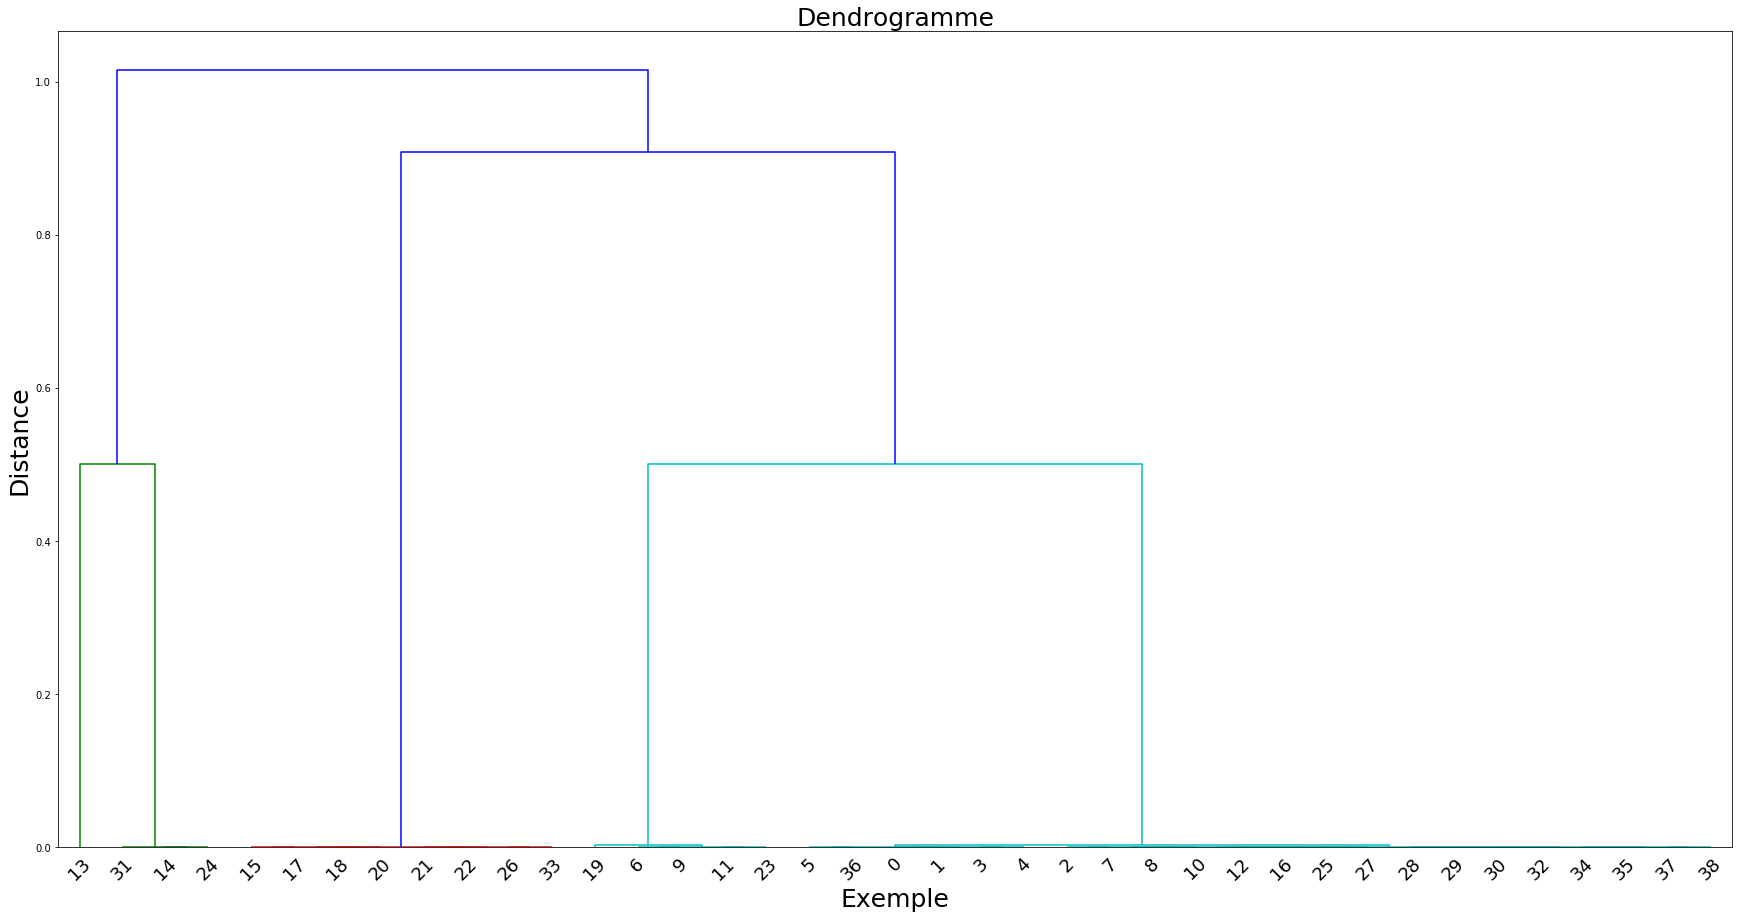

In [142]:
clu.clustering_hierarchique(Data_Donnees_Cluster,"euclidienne")

Resusltat : il y a énormement de fusion (avec des petites distances proche de 0 , souvent 0) pour les données dont le genre_id valait 0,00176 (valeur non normalisé --> 35 genre Comédy).
Du coup on peut donc dire que le film aura tendance à être un film de genre comedy (apres au nievau des autre fusion on voit que le genre Animation et children sont remarquables mais + minoritaire).

Les acteurs dont la catégorie spécifique de genre comedy ont tendance a être majoritairement regroupé.
Remarques:
    Les fusion sont difficelement visbles sur l'axe des abcissses car les fuions sont très proches (distance 0).

ClASSIFICATION SUPERVISEE:

    On va tenter de prédire la catégorie d'un film en utilisant une approche supervisée

Voici le plan de notre Démarche:
    
            Comme nous l'avons vu dans le cours n°10, notre objectif va être de transformer le problème multiclasse en un 
            problème de classe binaires. Initialement on a 19 genres , et on  veut pouvoir retrouver le genre d'un film parmis 
            ces 19 genres.
            Pour cela on va utiliser l'approche du 1 contre tous.
            
            Protocole:
            
                Initialement on part d'une base d'exemples. Cette base contiendra tous les films pour lesquelles on souhaite 
                prédire le genre qui leur est associé. Pour chacun de ces films on déterminera un vecteur de coordonées.
                Chaque vecteurs de coordonnées sera propre à chaque film. (Le but étant également de trouver les bons
                paramètres que l'on associera à un film , afin d'améliorer sa classification  --> pour cela nous ferons
                plusieurs essais sur différents vecteur de coordonées.). 
                
                Nous sommes dans le cas d'une classification supervisée, c'est à dire que pour chaque film il sera nécessaire 
                de lui attribué une classe. On est dans la situation du 1 contre tous. C'est à dire que nous avons au total
                19 genres , donc pour ces 19 genres il sera nécessaire de créer un classifieurs (un classifieurs pour chaque
                genre). Ce classifieur nous permettra de savoir si le film qu'il traite fait partit d'un genre ou non.
                On est donc ramener à un problème de classe binaire, car le classifieur qui représente un genre , va nous
                permettre de savoir si un film fait partit d'un genre (son label sera 1) ou non(son label sera -1).
                
                Attention : Au début on part d'un ensemble commun de films où chacun est décrit à partir d'un vecteur de
                            coordonées. Mais le label associé à ces films varie selon le classifieurs que l'on choisit.
                            Par exemple si je tente de classer un film qui est du genre Action , lorsque je trnasmetrai
                            au classifieur action il faudra que je lui attribue une classe 1. Mais lorsque je le transmettrai 
                            au classifieur de genre Drama il faudra que je lui attribue une classe -1.
                            C'st à dire qu'il faudra associer à chaque classifieurs un jeu de données différents, dont les 
                            seules différences observées seront sur les labels des exemples.
                            
                Chaque classifieur agira sur l'ensemble de données qu'on lui fournira. On tracera la frontière de décision 
                que chaque classifieur aura déterminer à partir de l'ensemble de données qu'on lui aura fournit (et on 
                affichera le taux d'accuracy de ce classifieurs pour savoir si il  a bien fait son travail de classificatiopn).
                
                
                Exploitation des données:
                    Pour chaque classe prédit par un classifieur sur un film , on recupère  le score claculé par les 
                    classifieurs pour ce film , et on ne garde que le score maximale. Ainsi le score maximale calculé 
                    par un classifieur d'un genre , sera associé au genre du film .
                    
                    On peut par exemple stocker dans des ensembles les différents scores calculés pour 
                    chaques films calculés par chacun des classifieurs.Ainsi à la fin du travail de tous les classifieurs (
                    19 genres -> 19 classifieurs) , on récupères l'ensembles des scores de chaque classifieurs.
                    On aura 19 ensembles de scores , pour chaque valeur de ces 19 ensembles , on récup à chaque ittérations,
                    le score maximale. Ainsi pour un classifieur de genre X dont le score est sup à tous les autres 
                    classifieurs , le film courant sera de genre X.
                    
                    
         Conclusion : pour chaque film on aura le genre qui lui est associé ( Les valeurs des accuracy des différents
         classifieurs nous donneront une indication pour savoir si on nos résultats trouvés sont fiables ou non).
                            
            




In [143]:
movies2[0]

{'adult': False,
 'backdrop_path': '/dji4Fm0gCDVb9DQQMRvAI8YNnTz.jpg',
 'genre_ids': ['16', '35', '10751'],
 'id': 862,
 'original_language': 'en',
 'original_title': 'Toy Story',
 'overview': "Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",
 'poster_path': '/rhIRbceoE9lR4veEXuwCC2wARtG.jpg',
 'release_date': '1995-10-30',
 'title': 'Toy Story',
 'video': False,
 'vote_average': 7.9,
 'vote_count': 9550,
 'popularity': 22.773}

On va commencer par décrire un film à partir de sa note et deson nombre de vottant (vote_average,vote_count)

In [144]:
tab_films_name=[]
tab_films_note=[]
tab_fims_vote=[]
tab_films_genre=[] #va nous etre utile pour déterminer le label associé à une classe

for movie in movies2:
    tab_films_note.append(movie['vote_average'])
    tab_fims_vote.append(movie['vote_count'])
    tab_films_genre.append(movie['genre_ids'])
    tab_films_name.append(movie['title'])

On adapte le tableau associéaux genre_ids

In [145]:
tab_film_genre_adapte=[]

for tab in tab_films_genre:
    ch='|'.join(tab)
    tab_film_genre_adapte.append(ch)

In [146]:
tab_film_genre_adapte[0:5]

['16|35|10751', '12|14|10751', '35|10749', '35|18|10749', '35']

On génère un Dataframe à partir des donnéesqu'on a récupéré

In [147]:
frames=[] #on y ajoute les lignes du Datframe au fur et à mesure

for i in range(0,len(tab_films_name)):  #ici je prend 1000 acteurs mais larbre ne supporte pas un grand nombre de recusrsions , je vais donc devoir selectionner qulques acteurs dont la classe est 1 et quelques acetrrus dont la classe est -1 pour voir apparaitre une frontiere de decision       
    #Construction de la ligne
    Liste=[]
    Liste.append(tab_films_name[i])
    Liste.append(tab_films_note[i])
    Liste.append(tab_fims_vote[i])
    Liste.append(tab_film_genre_adapte[i])
    Matrice=np.array([Liste])
    ligne=pd.DataFrame(Matrice)
    frames.append(ligne)

Ens_Donnee=pd.concat(frames)
Ens_Donnee.columns = ['title' , 'vote_average', 'vote_count', 'genre_ids']

In [148]:
Ens_Donnee.head()

,title,vote_average,vote_count,genre_ids
0,Toy Story,7.9,9550,16|35|10751
0,Jumanji,7.1,5594,12|14|10751
0,Grumpier Old Men,6.5,140,35|10749
0,Waiting to Exhale,6.1,55,35|18|10749
0,Father of the Bride Part II,6.1,288,35


Comme on a dit on a dit on part d'un ensemble de données communs. Mais on doit adapté la derniere caractéristique (le label) en fonction du classifieur que l'on utilise.

Rappel: 19 genres = 19 classifieurs --> ClassifieurDrama : genre Drama,...........,Classifieur Action: genre Action.


Voici les differents classifieurs qu'il nous reste à faire.

ClassifieurAnimation  -> genre 'Animation',
ClassifieurComedy : -> genreComedy,
ClassifieurChildren : -> genreChildren,
ClassifieurAdventure -> genreAdventure
ClassifieurFantasy: -> genreFantasy,
ClassifieurRomance: -> Romance,
ClassifieurDrama -> genreDrama,
ClassifieurAction -> genreAction,
ClassifieurCrime -> genreCrime,
ClassifieurThriller -> Thriller,
ClassifieurHorror  -> Horror,
ClassifieurSci-Fi -> Sci-Fi,
ClassifieurMystery -> genreMystery,
ClassifieurWar -> genreWar,
ClassifieurMusical  -> genreMusical,
ClassifieurDocumentary -> genreDocumentary,
ClassifieurWestern  -> genreWestern,
ClassifieurDrama -> genreDrama,

On a une base commune (Ens_Donnee) qu'il  va falloir transfomer en labelSet pour réaliser notre Classification.
On aura besoin d'autant de jeu de donnée que de classifieur , car les label varie d'un classifieurs à un autre

Avant de commencer notre classification , on va définir tous les Jeu de données dont on a besoin.

On va appliquer le 'one_Rot encoding' -> pour chaque film on lui attribue uun 1 si il fait partit d'un genre sinon 0.

In [149]:
List_id_genre=[]
List_name_genre=[]

for key in dictionaire_genre_idgenre.keys():
    List_id_genre.append(key)
    List_name_genre.append(dictionaire_genre_idgenre[key])
    

In [150]:
print('List_id_genre: ',List_id_genre)
print('List_name_genre: ',List_name_genre)

List_id_genre:  ['16', '35', '10751', '12', '14', '10749', '18', '28', '80', '53', '27', '36', '878', '9648', '10752', '10402', '99', '37', '10770']
List_name_genre:  ['Animation', 'Comedy', 'Children', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', '', 'Sci-Fi', 'Mystery', 'War', 'Musical', 'Documentary', 'Western', 'Drama']


In [151]:
dico_one_rot_encoding=dict() #les clé seront les noms des films et les valurs -> un vecteur de valeur qui varient entre 0 et  1 pour savoir si le film fait partit du genre désigné

for i in range (len(tab_films_name)): #pour chaque film je récup son vecteur de 0 et 1 afin de réaliser le one_rot encoding
    movie=tab_films_name[i]
    vec=[]
    genre=tab_films_genre[i]
    for genreid in List_id_genre:
        if(genreid in genre):
            vec.append(1)
        else:
            vec.append(0)
    
    dico_one_rot_encoding[movie]=vec



In [152]:
print('dico obtenue en sachant que on a cette liste dans cet ordre :')
print('List_name_genre: ',List_name_genre)
print('Toy story :',dico_one_rot_encoding['Toy Story'])

dico obtenue en sachant que on a cette liste dans cet ordre :
List_name_genre:  ['Animation', 'Comedy', 'Children', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', '', 'Sci-Fi', 'Mystery', 'War', 'Musical', 'Documentary', 'Western', 'Drama']
Toy story : [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Maintenant on peut travailler :
    on a notre dico_one_rot_encoding , c'est ce qui va nous permettre de savoir si un film est de ce genre oui ou non,
    Ainsi il va nous être facile de définir les labels pour notre jeu de données qu'on donne à l'entré d'un classifieur.

On peut commencer à Travailler:


On va commencer par définir le jeu de données associé au genre Animation et le ClassieurAnimation.
Animation est en position 0 du tableau.

In [171]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][0]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    

In [176]:
print('Jeu de données du genre Animation:')
print('donnees: ', liste_donnees[0:5])  #pour chaque film on a le label qui lui est associé 
print('labels: ',liste_label[0:5])   # dans cette exemple , pour chaque films on sait si oui ou non il est du genre Animation

Jeu de données du genre Animation:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [1, -1, 1, 1, 1]


Il ne nous reste plus qu'a définir notre labelSet et notre classifieur (Nous allons enregistrer le score de chaque prédiction du classifieur dans un ensemble set) 

In [155]:
def GenereLabelSet(Donnes,Label):
    dimension=len(Donnes[0])
    Lset = ls.LabeledSet(dimension)
    for i in range(0,len(Donnes)):
        Lset.addExample(Donnes[i],Label[i])
        
    return Lset
        

On va normaliser les données

In [156]:
liste_donnees=np.array(liste_donnees)

In [157]:
import math

def norma(M_Dataf):    
    for j in range(0,len(M_Dataf[0])):
        colonne=M_Dataf[0: , j]
        maxx=colonne.max()
        minn=colonne.min()
        for i in range(0,len(colonne)):
            M_Dataf[i][j]=(M_Dataf[i][j]-minn)/(maxx-minn)
            
    return M_Dataf

In [158]:
liste_donnees_norma=norma(liste_donnees)
#liste_donnees

In [159]:
LsetAnimation=GenereLabelSet(liste_donnees,liste_label)

In [160]:
#ls.affiche_base(LsetAnimation)

In [161]:
k=cl.KernelPoly()

Accuracy: 100.0


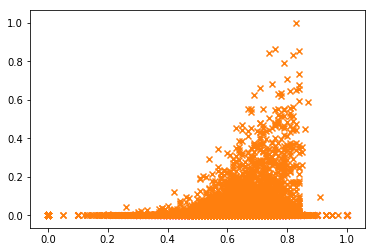

In [162]:
ClassifieurAnimation=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurAnimation.train(LsetAnimation)
print("Accuracy:",ClassifieurAnimation.accuracy(LsetAnimation))
ut.plot_frontiere(LsetAnimation,ClassifieurAnimation)
ut.plot2DSet(LsetAnimation)

In [181]:
scoresAnimation=ClassifieurAnimation.scores

CLASSIFIEURCOMEDY

Comedy est en position 1 du tableau.

In [173]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][1]==1): #on recup la valeur de la collone 1 car c'est elle qui correspond au genre Comedy 
        liste_label.append(1)
    else:
        liste_label.append(-1)
    

In [ ]:
def Test(norma,new2,classi):
    
    somme=0
    tot=0
    for i in range(0,len(norma)):
        if(new2[i][0]==1):
            #print('je suis la :',new2[i][0])
            val=classi.predict(norma[i])
            #print(val)
            if(val>=0):
                somme+=1
            tot+=1
    return tot/somme


In [175]:
print('Jeu de données du genre Comedy:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5])  

Jeu de données du genre Comedy:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [1, -1, 1, 1, 1]


In [177]:
liste_donnees=np.array(liste_donnees)

In [178]:
liste_donnees_norma=norma(liste_donnees)

In [179]:
LsetComedy=GenereLabelSet(liste_donnees,liste_label)

Accuracy: 68.63757990188792


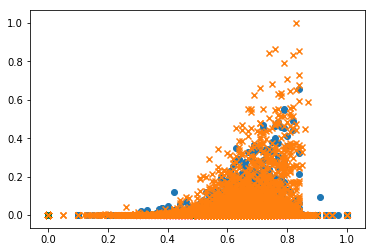

In [180]:
ClassifieurComedy=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurComedy.train(LsetComedy)
print("Accuracy:",ClassifieurComedy.accuracy(LsetComedy))
ut.plot_frontiere(LsetComedy,ClassifieurComedy)
ut.plot2DSet(LsetComedy)

In [182]:
scoresComedy=ClassifieurComedy.scores

CLASSIFIEURCHILDREN

CHildren est en position 2 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

In [184]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][2]==1): #on recup la valeur de la collone 2 car c'est elle qui correspond au genre Children
        liste_label.append(1)
    else:
        liste_label.append(-1)
    

In [ ]:
def Test(norma,new2,classi):
    
    somme=0
    tot=0
    for i in range(0,len(norma)):
        if(new2[i][0]==1):
            #print('je suis la :',new2[i][0])
            val=classi.predict(norma[i])
            #print(val)
            if(val>=0):
                somme+=1
            tot+=1
    return tot/somme


In [186]:
print('Jeu de données du genre Children:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5])  

Jeu de données du genre Children:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [1, 1, -1, -1, -1]


Accuracy: 93.71933997324216


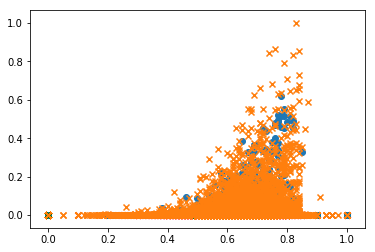

In [187]:
liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetChildren=GenereLabelSet(liste_donnees,liste_label)


ClassifieurChildren=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurChildren.train(LsetChildren)
print("Accuracy:",ClassifieurChildren.accuracy(LsetChildren))
ut.plot_frontiere(LsetChildren,ClassifieurChildren)
ut.plot2DSet(LsetChildren)

In [192]:
scoresChildren=ClassifieurChildren.scores

CLASSIFIEURADVENTURE

Adventure est en position 3 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

In [188]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][3]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Advneture:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 

Jeu de données du genre Advneture:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, 1, -1, -1, -1]


Accuracy: 91.16991229374163


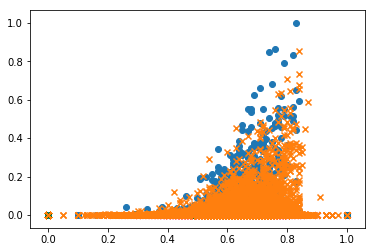

In [191]:
liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetAdventure=GenereLabelSet(liste_donnees,liste_label)


ClassifieurAdventure=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurAdventure.train(LsetAdventure)
print("Accuracy:",ClassifieurAdventure.accuracy(LsetAdventure))
ut.plot_frontiere(LsetAdventure,ClassifieurAdventure)
ut.plot2DSet(LsetAdventure)

In [193]:
scoresAdventure=ClassifieurAdventure.scores

CLASSIFIEURFANTASY

Adventure est en position 4 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Fantasy:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, 1, -1, -1, -1]
Accuracy: 94.5183588523859


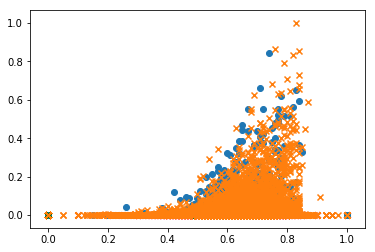

In [194]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][4]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Fantasy:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetFantasy=GenereLabelSet(liste_donnees,liste_label)


ClassifieurFantasy=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurFantasy.train(LsetFantasy)
print("Accuracy:",ClassifieurFantasy.accuracy(LsetFantasy))
ut.plot_frontiere(LsetFantasy,ClassifieurFantasy)
ut.plot2DSet(LsetFantasy)


scoresFantasy=ClassifieurFantasy.scores

CLASSIFIEURRomance

Romance est en position 5 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Romance:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, 1, 1, -1]
Accuracy: 82.60740300282444


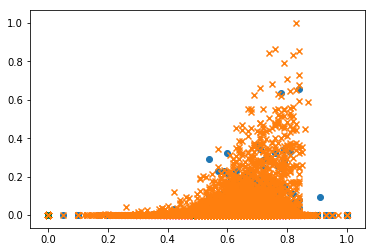

In [196]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][5]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Romance:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetRomance=GenereLabelSet(liste_donnees,liste_label)


ClassifieurRomance=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurRomance.train(LsetRomance)
print("Accuracy:",ClassifieurRomance.accuracy(LsetRomance))
ut.plot_frontiere(LsetRomance,ClassifieurRomance)
ut.plot2DSet(LsetRomance)


scoresRomance=ClassifieurRomance.scores

CLASSIFIEURDrama

Drama est en position 6 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Drama:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, 1, -1]
Accuracy: 50.38278578861305


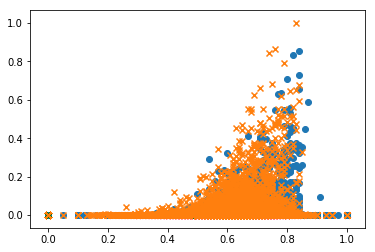

In [199]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][6]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Drama:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetDrama=GenereLabelSet(liste_donnees,liste_label)


ClassifieurDrama=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurDrama.train(LsetRomance)
print("Accuracy:",ClassifieurDrama.accuracy(LsetDrama))
ut.plot_frontiere(LsetDrama,ClassifieurDrama)
ut.plot2DSet(LsetDrama)


scoresDrama=ClassifieurDrama.scores

CLASSIFIEURAction

Action est en position 7 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Action:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 84.59565928348447


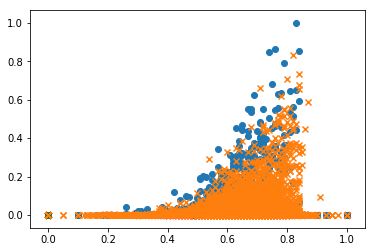

In [200]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][7]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Action:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetAction=GenereLabelSet(liste_donnees,liste_label)


ClassifieurAction=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurAction.train(LsetAction)
print("Accuracy:",ClassifieurAction.accuracy(LsetAction))
ut.plot_frontiere(LsetAction,ClassifieurAction)
ut.plot2DSet(LsetAction)


scoresAction=ClassifieurAction.scores

CLASSIFIEURCrime

Crime est en position 8 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Crime:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 88.79887022446856


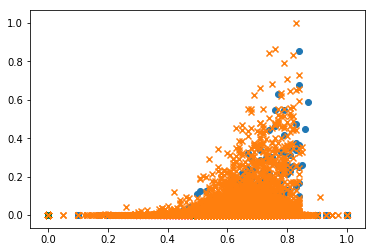

In [201]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][8]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Crime:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetCrime=GenereLabelSet(liste_donnees,liste_label)


ClassifieurCrime=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurCrime.train(LsetCrime)
print("Accuracy:",ClassifieurCrime.accuracy(LsetCrime))
ut.plot_frontiere(LsetAction,ClassifieurCrime)
ut.plot2DSet(LsetCrime)


scoresCrime=ClassifieurCrime.scores

CLASSIFIEURThriller

Thriller est en position 9 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Thriller:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 81.78236955552252


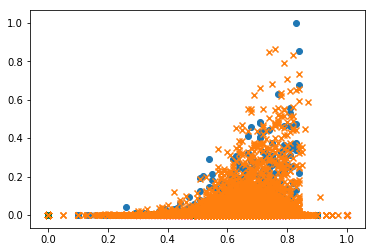

In [204]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][9]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Thriller:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetThriler=GenereLabelSet(liste_donnees,liste_label)


ClassifieurThriler=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurThriler.train(LsetThriler)
print("Accuracy:",ClassifieurThriler.accuracy(LsetThriler))
ut.plot_frontiere(LsetThriler,ClassifieurThriler)
ut.plot2DSet(LsetThriler)


scoresThriler=ClassifieurThriler.scores

CLASSIFIEURTHorror

Horror est en position 10 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Horror:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 89.73911104504236


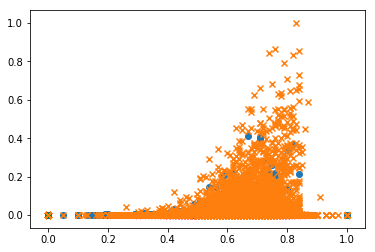

In [206]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][10]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Horror:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetHorror=GenereLabelSet(liste_donnees,liste_label)


ClassifieurHorror=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurHorror.train(LsetHorror)
print("Accuracy:",ClassifieurHorror.accuracy(LsetHorror))
ut.plot_frontiere(LsetHorror,ClassifieurHorror)
ut.plot2DSet(LsetHorror)


scoresHorror=ClassifieurHorror.scores

CLASSIFIEURSansgenre

Sansgenre est en position 11 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Sansgenre:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 96.45830236360933


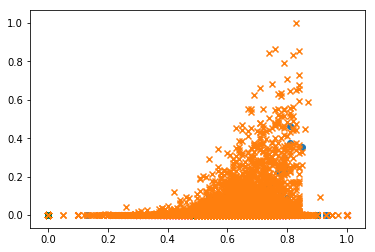

In [207]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][11]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Sansgenre:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetSansgenre=GenereLabelSet(liste_donnees,liste_label)


ClassifieurSansgenre=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurSansgenre.train(LsetSansgenre)
print("Accuracy:",ClassifieurSansgenre.accuracy(LsetSansgenre))
ut.plot_frontiere(LsetSansgenre,ClassifieurSansgenre)
ut.plot2DSet(LsetSansgenre)


scoresSansgenre=ClassifieurSansgenre.scores

CLASSIFIEURSciFI

SciFi est en position 12 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre SciFi:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 92.88687379218077


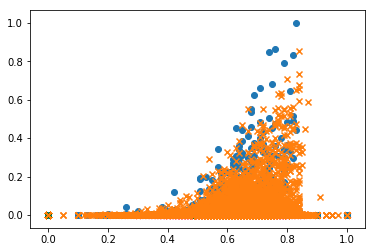

In [208]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][12]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre SciFi:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetSciFi=GenereLabelSet(liste_donnees,liste_label)


ClassifieurSciFi=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurSciFi.train(LsetSciFi)
print("Accuracy:",ClassifieurSciFi.accuracy(LsetSciFi))
ut.plot_frontiere(LsetSciFi,ClassifieurSciFi)
ut.plot2DSet(LsetSciFi)


scoresSciFi=ClassifieurSciFi.scores

CLASSIFIEURMystery

Mystery est en position 13 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Mystery:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 93.77136910955849


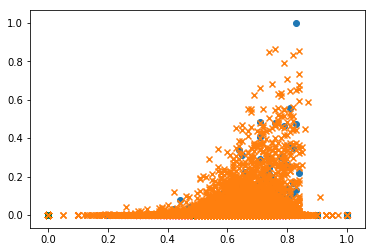

In [211]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][13]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Mystery:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetMystery=GenereLabelSet(liste_donnees,liste_label)


ClassifieurMystery=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurMystery.train(LsetMystery)
print("Accuracy:",ClassifieurMystery.accuracy(LsetMystery))
ut.plot_frontiere(LsetMystery,ClassifieurMystery)
ut.plot2DSet(LsetMystery)


scoresMystery=ClassifieurMystery.scores

CLASSIFIEURWar

War est en position 14 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre War:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 96.45458599672959


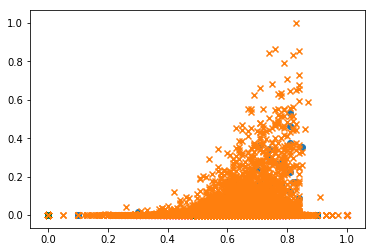

In [212]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][14]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre War:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetWar=GenereLabelSet(liste_donnees,liste_label)


ClassifieurWar=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurWar.train(LsetWar)
print("Accuracy:",ClassifieurWar.accuracy(LsetWar))
ut.plot_frontiere(LsetWar,ClassifieurWar)
ut.plot2DSet(LsetWar)


scoresWar=ClassifieurWar.scores

CLASSIFIEURMusical

Musical est en position 15 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Musical:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 95.6407016500669


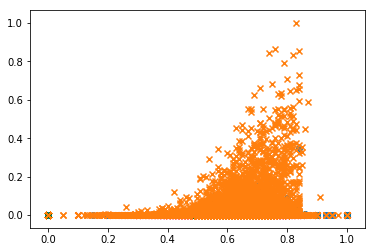

In [213]:
liste_label=[]
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][15]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Musical:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetMusical=GenereLabelSet(liste_donnees,liste_label)


ClassifieurMusical=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurMusical.train(LsetMusical)
print("Accuracy:",ClassifieurMusical.accuracy(LsetMusical))
ut.plot_frontiere(LsetMusical,ClassifieurMusical)
ut.plot2DSet(LsetMusical)


scoresMusical=ClassifieurMusical.scores

CLASSIFIEURDocumentary

Documentary est en position 16 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Documentary:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 95.6407016500669


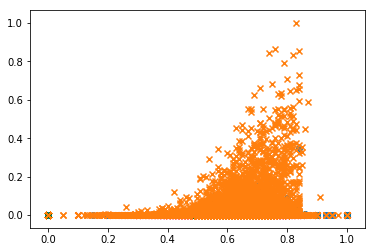

In [214]:
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][16]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Documentary:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetDocumentary=GenereLabelSet(liste_donnees,liste_label)


ClassifieurDocumentary=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurDocumentary.train(LsetDocumentary)
print("Accuracy:",ClassifieurDocumentary.accuracy(LsetDocumentary))
ut.plot_frontiere(LsetDocumentary,ClassifieurDocumentary)
ut.plot2DSet(LsetDocumentary)


scoresDocumentary=ClassifieurDocumentary.scores

CLASSIFIEURWestern

Western est en position 17 du tableau.  # je parle du vecteur des 19 valeurs ou 0->indique quil ne fait pas parti du genre et 1-> indique quil fait partit du genre

Jeu de données du genre Western:
donnees:  [[7.9, 9550], [7.1, 5594], [6.5, 140], [6.1, 55], [6.1, 288]]
labels:  [-1, -1, -1, -1, -1]
Accuracy: 95.6407016500669


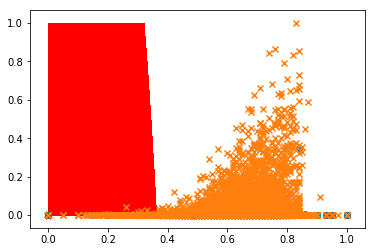

In [215]:
liste_donnees=[]
for i in range(0,len(tab_films_name)):
    movie=tab_films_name[i]
    donne=[]
    donne.append(tab_films_note[i])
    donne.append(tab_fims_vote[i])
    liste_donnees.append(donne)
    if(dico_one_rot_encoding[movie][17]==1):
        liste_label.append(1)
    else:
        liste_label.append(-1)
    
    
print('Jeu de données du genre Western:')
print('donnees: ', liste_donnees[0:5])
print('labels: ',liste_label[0:5]) 


liste_donnees=np.array(liste_donnees)
liste_donnees_norma=norma(liste_donnees)
LsetWestern=GenereLabelSet(liste_donnees,liste_label)


ClassifieurWestern=cl.ClassifierPerceptronKernelBatch(6,0.1,k)
ClassifieurWestern.train(LsetWestern)
print("Accuracy:",ClassifieurWestern.accuracy(LsetWestern))
ut.plot_frontiere(LsetWestern,ClassifieurWestern)
ut.plot2DSet(LsetWestern)


scoresWestern=ClassifieurWestern.scores

On observe que dans la pluspart des cas on une bonne classification en raison du bon taux d'accuraacy

Maintenant il ne nous reste plus qu'a récupérer le score max entre les différents classifieurs pour chacun des films, afin  de définir quel sera le genre prédit pour un film.
Pour ce faire nous allons construire une matrice avec tous les tableaux de scores associés à chacun des classifieurs que l'on a récupéré.

In [216]:
Matrice=[]   #List contenant un ensemble de score associé à différent classifieur
Matrice.append(scoresAnimation)
Matrice.append(scoresComedy)
Matrice.append(scoresChildren)
Matrice.append(scoresAdventure)
Matrice.append(scoresFantasy)
Matrice.append(scoresRomance)
Matrice.append(scoresDrama)
Matrice.append(scoresAction)
Matrice.append(scoresCrime)
Matrice.append(scoresThriler)
Matrice.append(scoresHorror)
Matrice.append(scoresSansgenre)
Matrice.append(scoresSciFi)
Matrice.append(scoresMystery)
Matrice.append(scoresWar)
Matrice.append(scoresMusical)
Matrice.append(scoresDocumentary)
Matrice.append(scoresWestern)


On récupère l'indice du score sur chacune des colonne , ainsi lindice nous permettra de connaitre le genre associé au film

In [218]:
Matrice=np.array(Matrice)

In [226]:
Mat=[]
for ensemble in Matrice:
    Mat.append(list(ensemble))

In [231]:
def indMax(Liste):
    
    indmaxx=0
    maxx=Liste[0]
    
    for i in range (0,len(Liste)):
        if(Liste[i]>maxx):
            maxx=Liste[i]
            indmaxx=i
    return indmaxx

In [233]:

Mat=np.array(Mat)

dicoFilmGenre=dict()

for j in range(0,len(Mat[0])):
    colonne=Mat[0: , j]
    ind_max=indMax(colonne)
    dicoFilmGenre[tab_films_name[j]]=List_name_genre[ind_max]
    
            


In [235]:
#dicoFilmGenre

Si on regarde le contenue de dicoFilmGenre on sapercoit que les genres trouvés ne sont pas les bons , il faudrait qu'on essaye avec d'autres paramètres que le nombre de votant et la note moyenne d'un film